<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#The-dataset" data-toc-modified-id="The-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The dataset</a></span><ul class="toc-item"><li><span><a href="#Categorical-columns-info" data-toc-modified-id="Categorical-columns-info-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical columns info</a></span></li></ul></li><li><span><a href="#Data-Wranging" data-toc-modified-id="Data-Wranging-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Wranging</a></span><ul class="toc-item"><li><span><a href="#Column-analysis" data-toc-modified-id="Column-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Column analysis</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Column-Transformation" data-toc-modified-id="Column-Transformation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Column Transformation</a></span><ul class="toc-item"><li><span><a href="#Department" data-toc-modified-id="Department-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Department</a></span></li><li><span><a href="#EducationField" data-toc-modified-id="EducationField-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>EducationField</a></span></li><li><span><a href="#JobRole" data-toc-modified-id="JobRole-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>JobRole</a></span></li><li><span><a href="#Marital-Status" data-toc-modified-id="Marital-Status-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Marital Status</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-dataset" data-toc-modified-id="Splitting-the-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Splitting the dataset</a></span></li><li><span><a href="#Testing-the-model" data-toc-modified-id="Testing-the-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Testing the model</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#RFE" data-toc-modified-id="RFE-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>RFE</a></span></li><li><span><a href="#SFS" data-toc-modified-id="SFS-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SFS</a></span></li><li><span><a href="#SBS" data-toc-modified-id="SBS-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>SBS</a></span></li><li><span><a href="#SFS-Floating" data-toc-modified-id="SFS-Floating-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>SFS Floating</a></span></li><li><span><a href="#SBS-Floating" data-toc-modified-id="SBS-Floating-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>SBS Floating</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#KNN" data-toc-modified-id="KNN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Decision-Tree,-Random-Forest,-XGBoost,-AdaBoost-and-CatBoost" data-toc-modified-id="Decision-Tree,-Random-Forest,-XGBoost,-AdaBoost-and-CatBoost-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Decision Tree, Random Forest, XGBoost, AdaBoost and CatBoost</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Which-model-has-the-best-Recall-Score?" data-toc-modified-id="Which-model-has-the-best-Recall-Score?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Which model has the best Recall Score?</a></span></li></ul></div>

# Introduction

This dataset includes fictional data created by IBM data scientists, with information about the IBM employees and wether the employee left the company or not. The dataset can be found [here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).

The objective is to predict, based on the data available, wether an employee will leave the company or not

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# The dataset

In [2]:
employees = pd.read_csv(r'C:\Users\Tiago McDonald\Documents\GitHub\Projects\Classification Model\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In this dataset we have:
    * 35 columns
    * 1470 data points
    * No missing values
    * 26 numerical columns and 9 object columns

We'll need to check the columns that are object, in order to transform them to categorical or ordinal values

## Categorical columns info

Education
   * 1 'Below College'
   * 2 'College'
   * 3 'Bachelor'
   * 4 'Master'
   * 5 'Doctor'

EnvironmentSatisfaction
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

JobInvolvement
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

JobSatisfaction
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

PerformanceRating
   * 1 'Low'
   * 2 'Good'
   * 3 'Excellent'
   * 4 'Outstanding'

RelationshipSatisfaction
   * 1 'Low'
   * 2 'Medium'
   * 3 'High'
   * 4 'Very High'

WorkLifeBalance
   * 1 'Bad'
   * 2 'Good'
   * 3 'Better'
   * 4 'Best'

# Data Wranging

## Column analysis

In [5]:
employees[['HourlyRate','DailyRate','MonthlyRate','MonthlyIncome']]

,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome
0,94,1102,19479,5993
1,61,279,24907,5130
2,92,1373,2396,2090
3,56,1392,23159,2909
4,40,591,16632,3468
...,...,...,...,...
1465,41,884,12290,2571
1466,42,613,21457,9991
1467,87,155,5174,6142
1468,63,1023,13243,5390


Apparently there is no real correlation between the 4 columns above, because:
    * The MonthlyRate is always higher than the Monthly Income
    * The MonthlyRate apparently is not proportional to the MonthlyIncome (and vice-versa)
    * The DailyRate is also not proportional to the MonthlyIncome, as well as the HourlyRate
So, we can conclude that there is no clear correlation between the 4 columns and, therefore, we cannot drop them to keep one

The Attrition column has the values that we want to predict, so this is the **dependant variable**. We'll need to convert the values Yes and No to numerical

In [6]:
employees.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [7]:
employees.Attrition = employees.Attrition.map({'Yes': 1, 'No': 0})

In [8]:
employees.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

We can see that the dependant variable is imbalanced:
    * 16.12% of the data points are employees that have Attrition
    * 83.88% of that data points are employees that don't have Attrition

The columns StandardHours and EmployeeCount only have 1 value so they will be dropped

In [9]:
employees[['StandardHours','EmployeeCount']]

,StandardHours,EmployeeCount
0,80,1
1,80,1
2,80,1
3,80,1
4,80,1
...,...,...
1465,80,1
1466,80,1
1467,80,1
1468,80,1


In [10]:
employees.drop(['StandardHours','EmployeeCount'], axis=1, inplace=True)

The column EmployeeNumber will also be dropped because it only has the number of the Employee

In [11]:
employees.drop('EmployeeNumber', axis=1, inplace=True)

The column Over18 also only has one value, so that one will be dropped as well

In [12]:
employees.Over18.unique()

array(['Y'], dtype=object)

In [13]:
employees.drop('Over18', axis=1, inplace=True)

In [14]:
employees.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
employees.OverTime = employees.OverTime.map({'Yes': 1, 'No': 0})

In [16]:
employees.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [17]:
employees.Gender = employees.Gender.map({'Female': 0, 'Male': 1})

In [18]:
employees.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [19]:
employees.BusinessTravel = employees.BusinessTravel.map({'Non-Travel':0
                              ,'Travel_Rarely':1
                              ,'Travel_Frequently':2})

We are going to see if there are columns that could be dropped. We have 35 columns, which is a lot, so we might drop the ones that have high correlation, in order to avoid multicollinearity

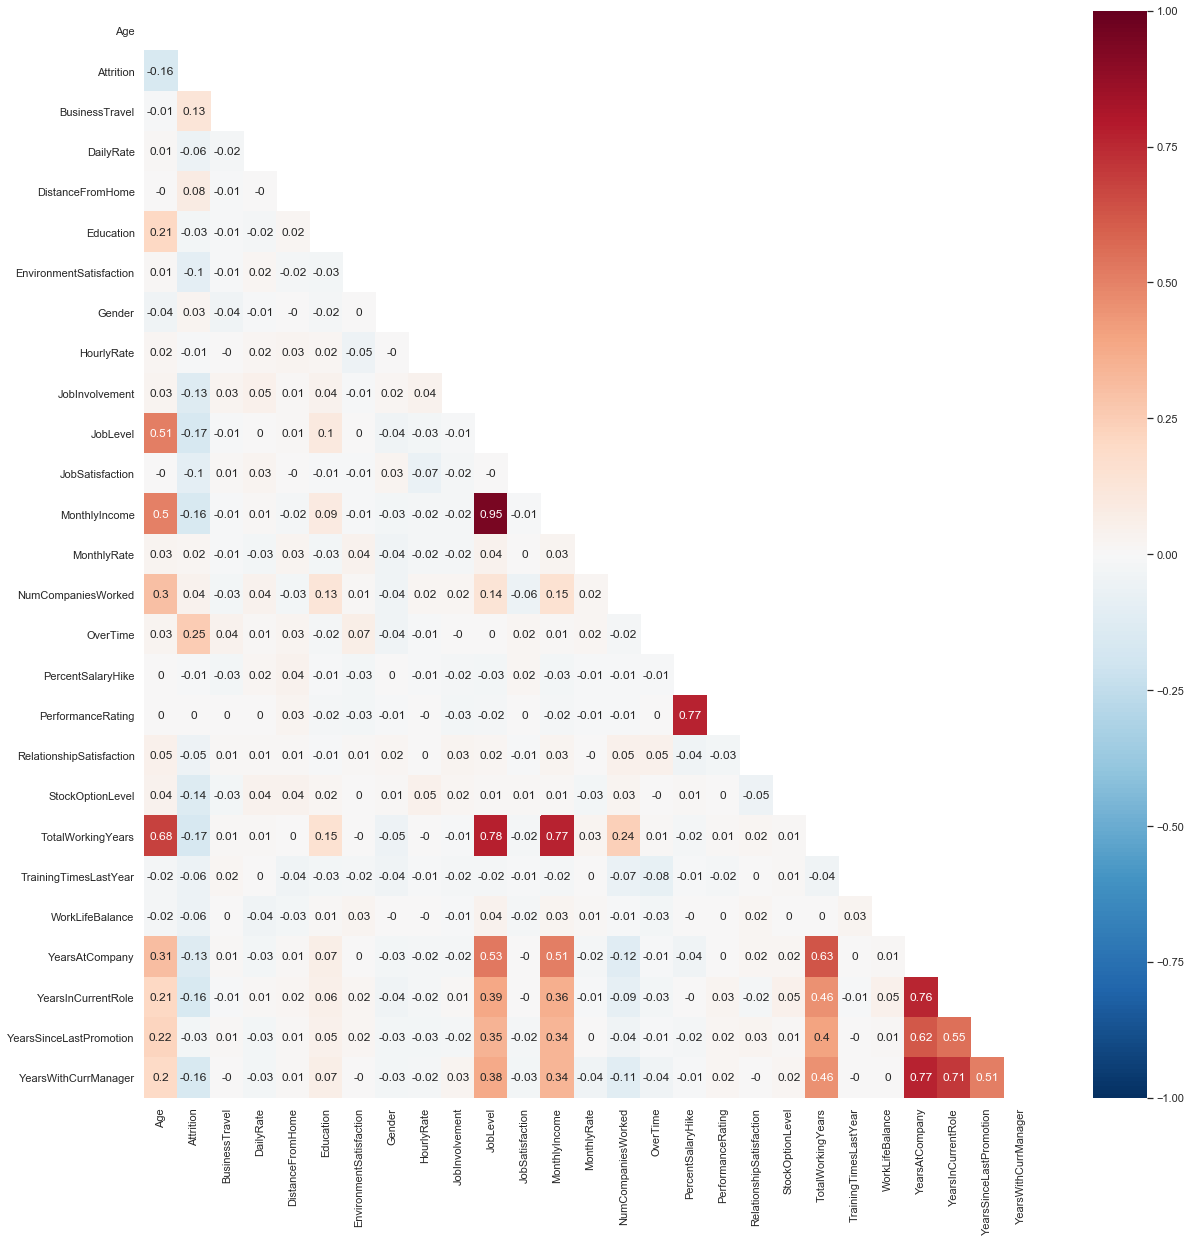

In [20]:
corr = employees.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");
    fig.savefig('heatmap.png')

Almost every column has a low correlation with each other, **except for JobLevel and MonthlyIncome, which have a correlation of 0.95**. Also, There are two columns which don't have any correlation with the rest of columns: **StandardHours and EmployeeCount**. We will look into those to see what values they have. As for the JobLevel and MonthlyIncome, we will drop the JobLevel column because it also has a high correlation with TotalWorkingYears.

In [21]:
employees.JobLevel.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [22]:
employees.drop('JobLevel', axis=1, inplace=True)

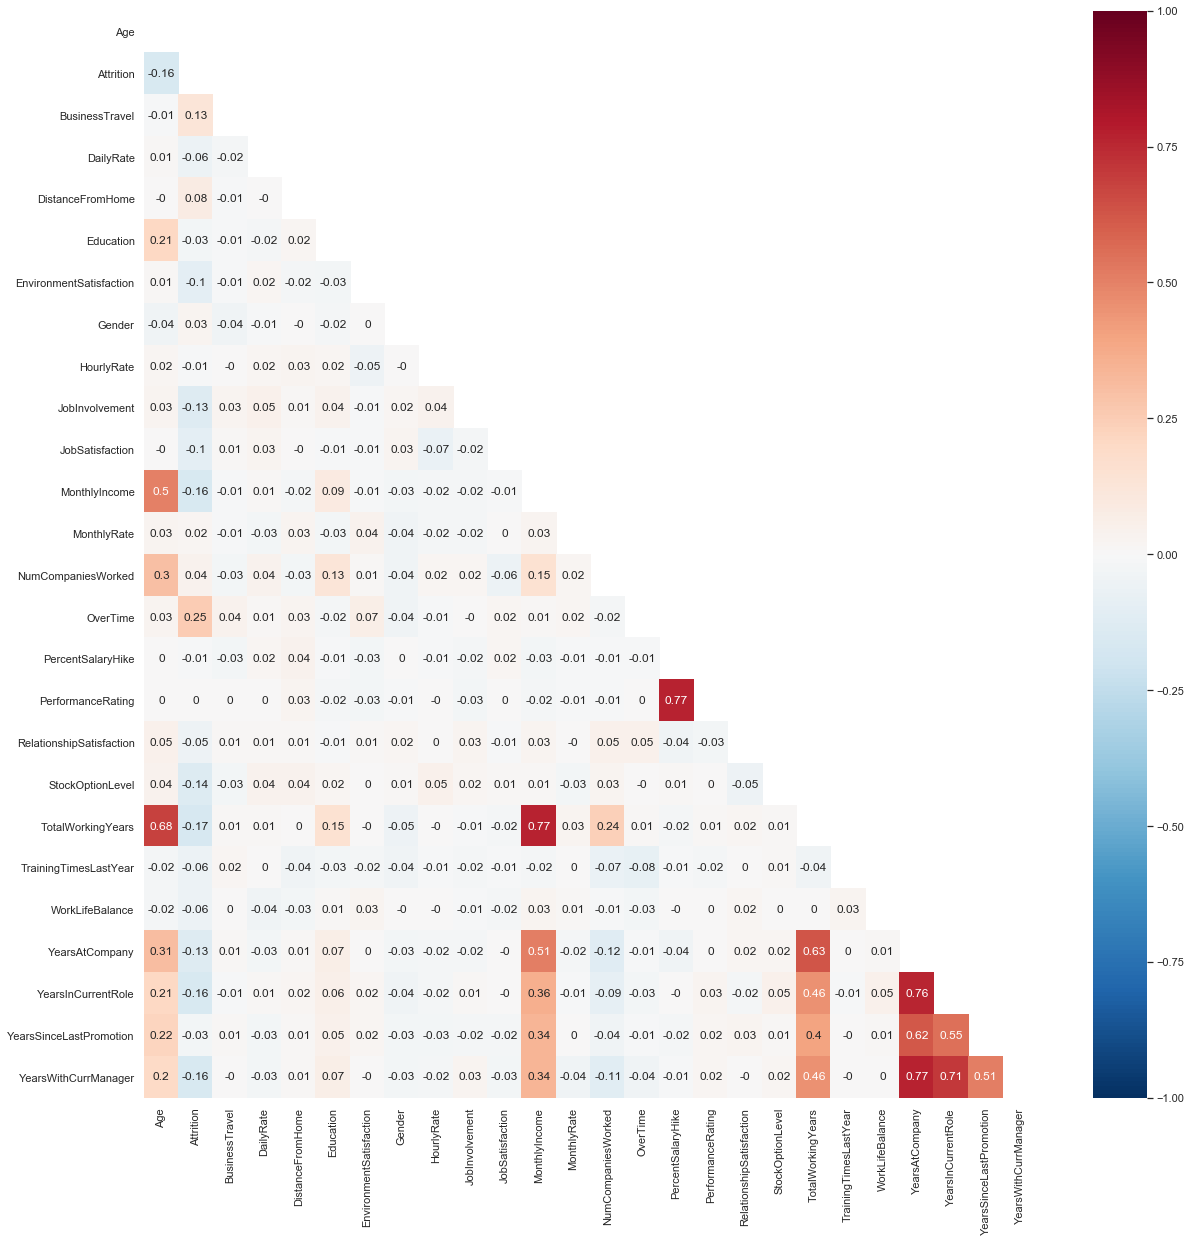

In [23]:
corr = employees.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");

## Feature Scaling

We will need to scale some features before doing a Logistic Regression or a KNN model because some features have a wide range of values. We will use normalization since most of them don't follow a normal distribution, except for Age, which we will standardize

C:\Users\Tiago McDonald\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


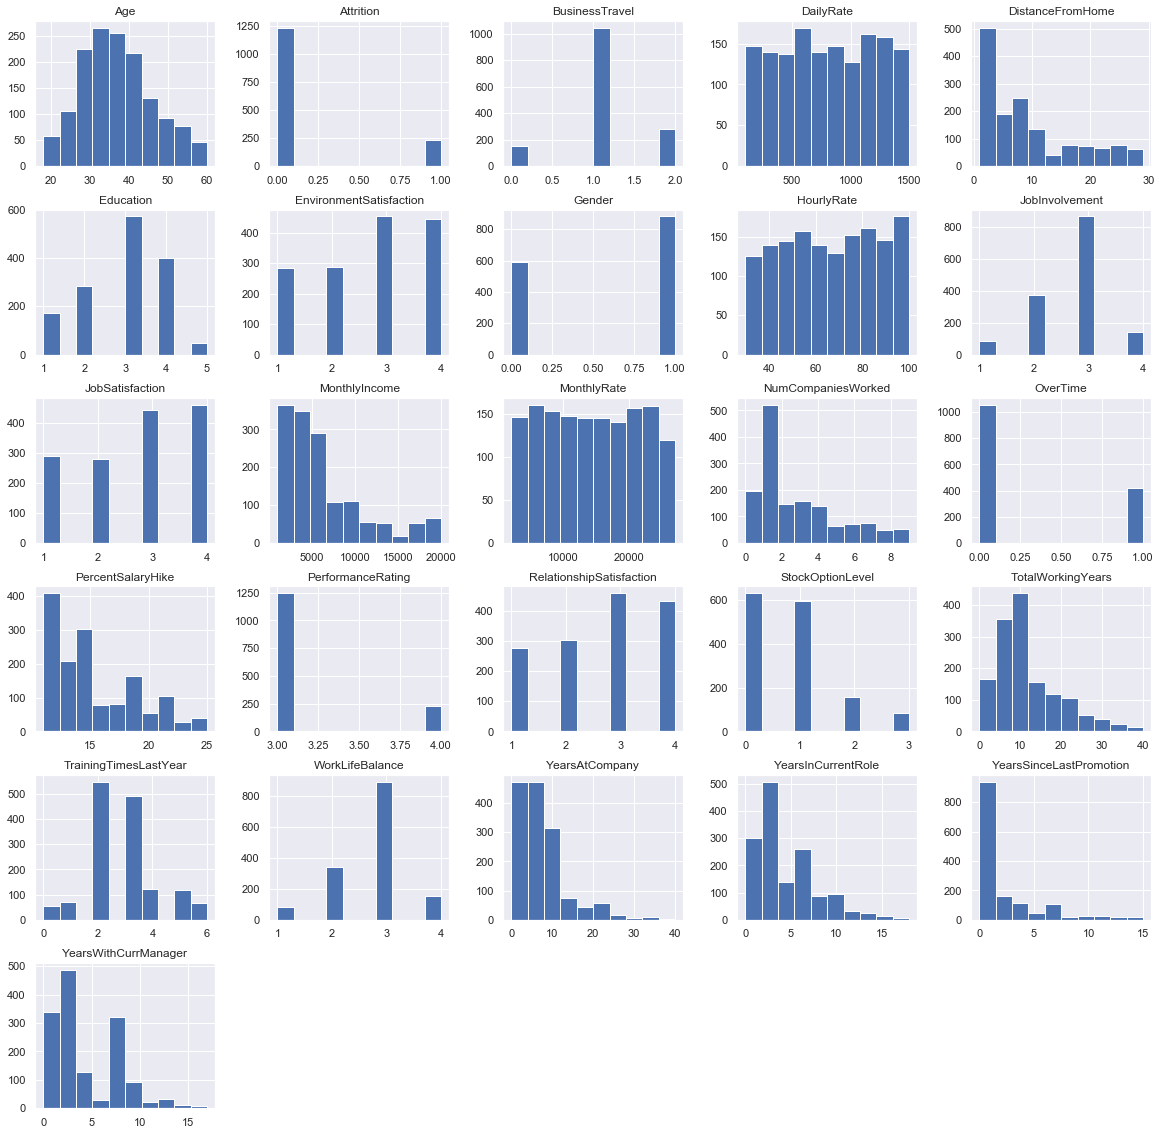

In [24]:
fig, ax = plt.subplots(figsize=(20,20))

employees.hist(figsize=(20,20), ax=ax)
plt.show()
fig.savefig('Histogram.png');

C:\Users\Tiago McDonald\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


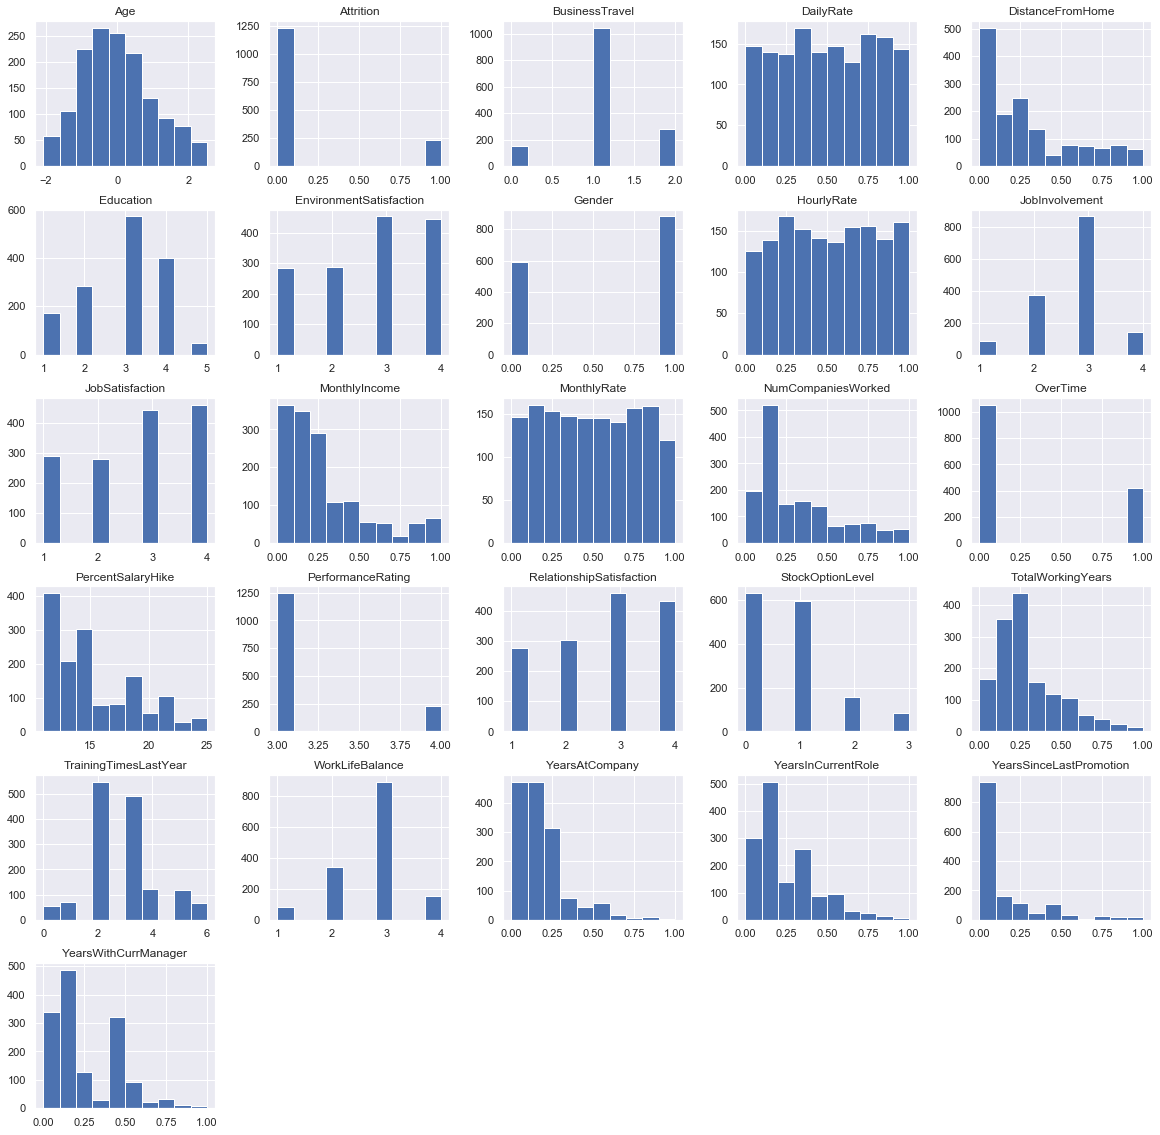

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

employees_scaled = employees.copy()

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

columns_normalize = ['DailyRate'
                     ,'DistanceFromHome'
                     ,'HourlyRate'
                     ,'MonthlyRate'
                     ,'MonthlyIncome'
                     ,'NumCompaniesWorked'
                     ,'TotalWorkingYears'
                     ,'YearsAtCompany'
                     ,'YearsInCurrentRole'
                     ,'YearsSinceLastPromotion'
                     ,'YearsWithCurrManager'
                    ]

normalized = min_max_scaler.fit_transform(employees_scaled[columns_normalize])

z = employees_scaled.Age.values
z=z.reshape(-1,1)
standardized = standard_scaler.fit_transform(z)

employees_scaled[columns_normalize] = pd.DataFrame(data=normalized)

employees_scaled['Age'] = pd.DataFrame(data=standardized)

fig, ax = plt.subplots(figsize=(20,20))

employees_scaled.hist(figsize=(20,20), ax=ax)
plt.show()
fig.savefig('Hist_standardizsed.png');

## Column Transformation

In this stage we're going to create a copy of the dataset so that the copy can be used for logistic regression since this one will have transformed columns and dummies

In [26]:
employees_reg = employees_scaled.copy()

### Department

In [27]:
employees_reg.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

This column has nominal values, so we'll convert this column to dummies

In [28]:
dummies = []
dummies.append('Department')

### EducationField

In [29]:
employees_reg[['Education','EducationField']]

,Education,EducationField
0,2,Life Sciences
1,1,Life Sciences
2,2,Other
3,4,Life Sciences
4,1,Medical
...,...,...
1465,2,Medical
1466,1,Medical
1467,3,Life Sciences
1468,3,Medical


The EducationField column has the name of the field. But we already have the Education column, which is already transformed. So we might not need the EducationField column. Let's check how many unique values it has.

In [30]:
employees_reg.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

It doesn't have too many unique values, so we'll keep it for now and add it to the dummies list

In [31]:
dummies.append('EducationField')

### JobRole

In [32]:
employees_reg.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [33]:
dummies.append('JobRole')

### Marital Status

In [34]:
employees_reg.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [35]:
dummies.append('MaritalStatus')

In [36]:
employees_dummies = pd.get_dummies(employees_reg, columns=dummies, drop_first=True)

In [37]:
employees_dummies

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,1,0.715820,0.000000,2,2,0,0.914286,3,...,0,0,0,0,0,0,1,0,0,1
1,1.322365,0,2,0.126700,0.250000,1,3,1,0.442857,2,...,0,0,0,0,0,1,0,0,1,0
2,0.008343,1,1,0.909807,0.035714,2,4,1,0.885714,2,...,0,1,0,0,0,0,0,0,0,1
3,-0.429664,0,2,0.923407,0.071429,4,4,0,0.371429,3,...,0,0,0,0,0,1,0,0,1,0
4,-1.086676,0,1,0.350036,0.035714,1,1,1,0.142857,3,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0,2,0.559771,0.785714,2,3,1,0.157143,4,...,0,1,0,0,0,0,0,0,1,0
1466,0.227347,0,1,0.365784,0.178571,1,4,1,0.171429,2,...,0,0,0,0,0,0,0,0,1,0
1467,-1.086676,0,1,0.037938,0.107143,3,2,1,0.814286,4,...,0,0,0,1,0,0,0,0,1,0
1468,1.322365,0,2,0.659270,0.035714,3,4,1,0.471429,2,...,0,0,0,0,0,0,1,0,1,0


# Logistic Regression

## Splitting the dataset

In [38]:
employees_dummies.Attrition.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

16% of the Employees have Attrition so we will need to stratify in order to keep the same proportion of Yes and No in the training and the test set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test,y_train,y_test = train_test_split(employees_dummies.drop('Attrition',axis=1), \
                                                  employees_dummies.Attrition, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=employees_dummies.Attrition
                                                 )

## Testing the model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
estimator=LogisticRegression(max_iter = 10000, class_weight='balanced')
model = estimator.fit(X_train,y_train)

y_pred1=model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

# Recall score will be the most important because we want the number of False Negatives to be as low as possible

log_recall = recall_score(y_test,y_pred1)

print(log_recall)

0.7341772151898734


We will now try using feature selection to see if we can improve the model

## Feature Selection

Because we have 47 columns, we'll need to do Feature Selection before running the Logistic Regression, so that we can choose the features with most significant value. We will use the wrappers for now.

### RFE

In [44]:
from sklearn.feature_selection import RFE

selector_w1=RFE(estimator, n_features_to_select=6)
model = selector_w1.fit(X_train,y_train)
y_pred1=model.predict(X_test)

columns_rfe=X_train.columns[model.support_]

In [45]:
columns_rfe

Index(['NumCompaniesWorked', 'OverTime', 'TotalWorkingYears',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'JobRole_Research Director'],
      dtype='object')

In [46]:
model.score(X_train,y_train)

0.7051020408163265

In [47]:
rfe_recall = recall_score(y_test,y_pred1)

print(rfe_recall)

0.7088607594936709


### SFS

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1=sfs(estimator, 
         k_features=7,
         forward=True,
         floating=False
         ,scoring='recall'
        )

model = sfs1.fit(X_train,y_train)

model.get_metric_dict()

{1: {'feature_idx': (13,),
  'cv_scores': array([0.3908046 , 0.23529412, 0.3655914 , 0.46808511, 0.4       ]),
  'avg_score': 0.3719550439161299,
  'feature_names': ('OverTime',),
  'ci_bound': 0.09805265128684525,
  'std_dev': 0.07628829387199992,
  'std_err': 0.038144146935999955},
 2: {'feature_idx': (13, 18),
  'cv_scores': array([0.48351648, 0.27160494, 0.42105263, 0.37735849, 0.4494382 ]),
  'avg_score': 0.4005941492360529,
  'feature_names': ('OverTime', 'TotalWorkingYears'),
  'ci_bound': 0.0942014202734688,
  'std_dev': 0.07329190530461764,
  'std_err': 0.03664595265230882},
 3: {'feature_idx': (13, 18, 28),
  'cv_scores': array([0.51111111, 0.32258065, 0.38      , 0.40816327, 0.47826087]),
  'avg_score': 0.42002317822874824,
  'feature_names': ('OverTime',
   'TotalWorkingYears',
   'EducationField_Marketing'),
  'ci_bound': 0.08703270326913452,
  'std_dev': 0.06771439993036749,
  'std_err': 0.03385719996518374},
 4: {'feature_idx': (13, 18, 28, 37),
  'cv_scores': array([0.5

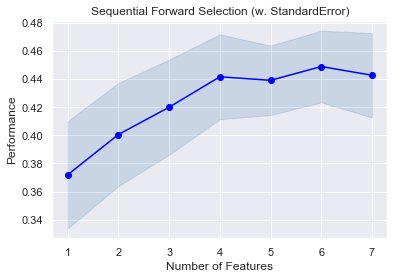

<Figure size 432x288 with 0 Axes>

In [67]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StandardError)')
plt.show()
plt.savefig('SFS_graph.png')

So the recall score stops improving after 2 features. So we will choose 2 features

In [68]:
results = model.get_metric_dict()
columns_sfs = list(results[2]['feature_names'])
sfs_recall = results[2]['avg_score']

In [79]:
sfs1=sfs(estimator, 
         k_features=2,
         forward=True,
         floating=False
         ,scoring='recall'
        )

model = sfs1.fit(X_train,y_train)

X_train_sfs = model.transform(X_train)
X_test_sfs = model.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
estimator.fit(X_train_sfs, y_train)
y_pred = estimator.predict(X_test_sfs)

In [80]:
confusion_matrix(y_test, y_pred)

array([[ 26, 385],
       [  1,  78]], dtype=int64)

In [81]:
recall_score(y_test,y_pred)

0.9873417721518988

### SBS

In [50]:
sfs1=sfs(estimator, 
         k_features=7,
         forward=False,
         floating=False,
         scoring='recall'
        )

model = sfs1.fit(X_train,y_train)

model.get_metric_dict()

{42: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41),
  'cv_scores': array([0.78125   , 0.59375   , 0.65625   , 0.64516129, 0.80645161]),
  'avg_score': 0.6965725806451613,
  'feature_names': ('Age',
   'BusinessTravel',
   'DailyRate',
   'DistanceFromHome',
   'Education',
   'EnvironmentSatisfaction',
   'Gender',
   'HourlyRate',
   'JobInvolvement',
   'JobSatisfaction',
   'MonthlyIncome',
   'MonthlyRate',
   'NumCompaniesWorked',
   'OverTime',
   'PercentSalaryHike',
   'PerformanceRating',
   'RelationshipSatisfaction',
   'StockOptionLevel',
   'TotalWorkingYears',
   'TrainingTimesLastYear',
   'WorkLifeBalance',
   'YearsAtCompany',
   'YearsInCurrentRole',
   'YearsSinceLastPromotion',
   'YearsWithCurrManager',
   'Department

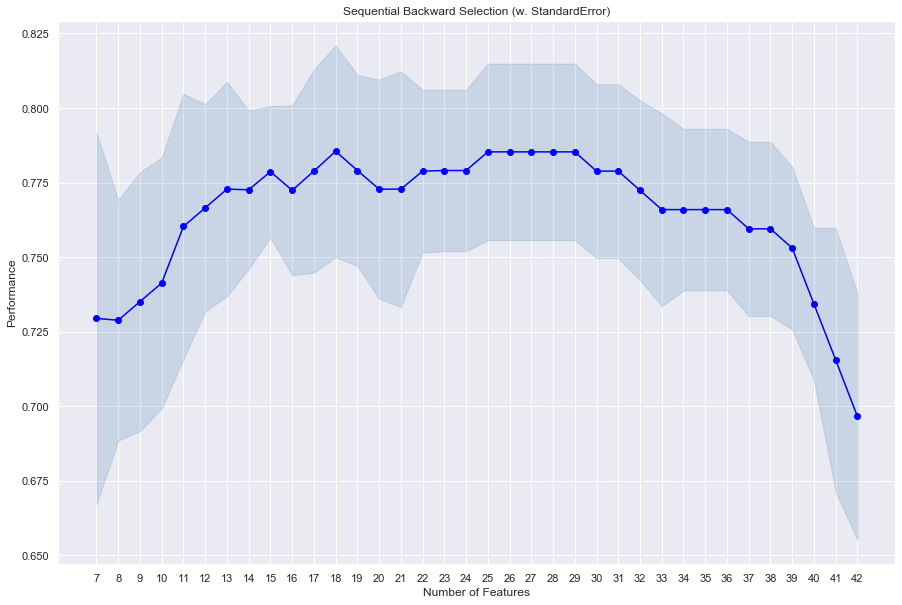

In [51]:
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err', figsize=(15, 10))
plt.title('Sequential Backward Selection (w. StandardError)')
plt.show()

The optimal recall score is around 0.785, with 18 features

In [52]:
results = model.get_metric_dict()
columns_sbs = list(results[18]['feature_names'])
sbs_recall = results[18]['avg_score']

### SFS Floating

In [53]:
sfs1=sfs(estimator, 
         k_features=7,
         forward=True,
         floating=True,
         scoring='recall'
        )

model = sfs1.fit(X_train,y_train)

model.get_metric_dict()

{1: {'feature_idx': (36,),
  'cv_scores': array([1.        , 1.        , 1.        , 0.96774194, 1.        ]),
  'avg_score': 0.9935483870967742,
  'feature_names': ('JobRole_Research Director',),
  'ci_bound': 0.01658439894590153,
  'std_dev': 0.0129032258064516,
  'std_err': 0.0064516129032258},
 2: {'feature_idx': (32, 36),
  'cv_scores': array([1.        , 1.        , 1.        , 0.96774194, 1.        ]),
  'avg_score': 0.9935483870967742,
  'feature_names': ('JobRole_Human Resources', 'JobRole_Research Director'),
  'ci_bound': 0.01658439894590153,
  'std_dev': 0.0129032258064516,
  'std_err': 0.0064516129032258},
 3: {'feature_idx': (30, 32, 36),
  'cv_scores': array([0.96875   , 0.96875   , 0.96875   , 0.96774194, 0.96774194]),
  'avg_score': 0.9683467741935484,
  'feature_names': ('EducationField_Other',
   'JobRole_Human Resources',
   'JobRole_Research Director'),
  'ci_bound': 0.000634739298565763,
  'std_dev': 0.0004938487384643363,
  'std_err': 0.0002469243692321682},
 4: 

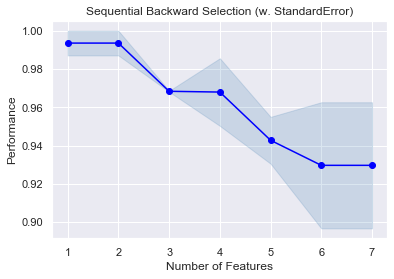

In [54]:
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (w. StandardError)')
plt.show()

SFS Floating returned the same result with the same number of features as the SFS. Let's move on to the SBS Floating

In [55]:
results = model.get_metric_dict()
columns_sfs_float = list(results[2]['feature_names'])
sfs_recall_float = results[2]['avg_score']

### SBS Floating

In [56]:
sfs1=sfs(estimator, 
         k_features=7,
         forward=False,
         floating=True,
         scoring='recall'
        )

model = sfs1.fit(X_train,y_train)

model.get_metric_dict()

{42: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41),
  'cv_scores': array([0.78125   , 0.59375   , 0.65625   , 0.64516129, 0.80645161]),
  'avg_score': 0.6965725806451613,
  'feature_names': ('Age',
   'BusinessTravel',
   'DailyRate',
   'DistanceFromHome',
   'Education',
   'EnvironmentSatisfaction',
   'Gender',
   'HourlyRate',
   'JobInvolvement',
   'JobSatisfaction',
   'MonthlyIncome',
   'MonthlyRate',
   'NumCompaniesWorked',
   'OverTime',
   'PercentSalaryHike',
   'PerformanceRating',
   'RelationshipSatisfaction',
   'StockOptionLevel',
   'TotalWorkingYears',
   'TrainingTimesLastYear',
   'WorkLifeBalance',
   'YearsAtCompany',
   'YearsInCurrentRole',
   'YearsSinceLastPromotion',
   'YearsWithCurrManager',
   'Department

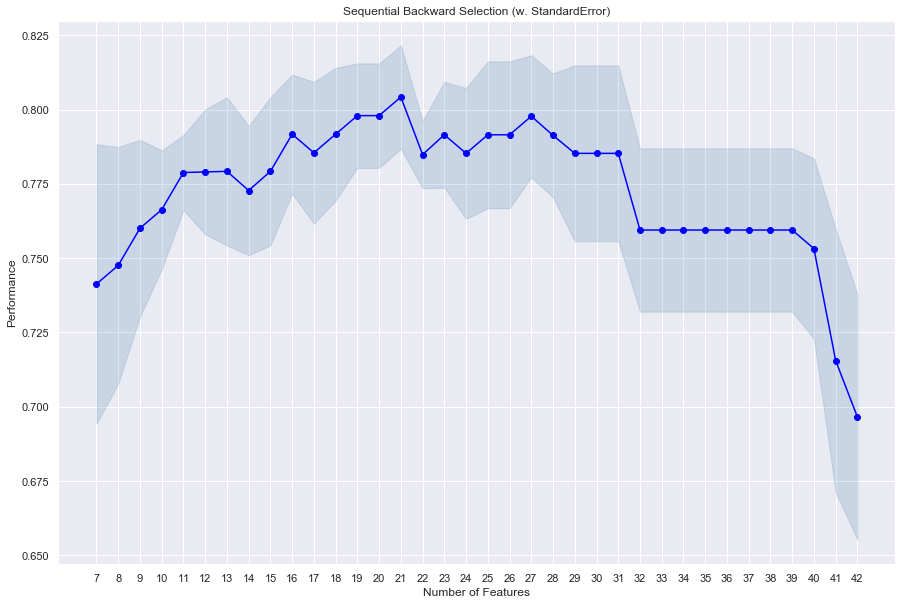

In [57]:
fig=plot_sfs(sfs1.get_metric_dict(), kind='std_err', figsize=(15, 10))
plt.title('Sequential Backward Selection (w. StandardError)')
plt.show()

In [58]:
results = model.get_metric_dict()
columns_sbs_float = list(results[21]['feature_names'])
sbs_recall_float = results[21]['avg_score']

## Conclusion

In [59]:
print(log_recall)
print(sfs_recall)
print(sbs_recall)
print(sfs_recall_float)
print(sbs_recall_float)

0.7341772151898734
0.9935483870967742
0.785483870967742
0.9935483870967742
0.804233870967742


We can see from the results above that using Feature Selection helped improve the recall score of the Logistic Regression Model. Also, using the Sequential Forward Selection was the one that gave the recall score, with 0.99, using 2 features.

In [84]:
columns_sfs

['JobRole_Human Resources', 'JobRole_Research Director']

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
X_train, X_test,y_train,y_test = train_test_split(employees_dummies.drop('Attrition',axis=1), \
                                                  employees_dummies.Attrition, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=employees_dummies.Attrition
                                                 )

We're going to find the optimal number of k by looking a smallest error rate

Text(0, 0.5, 'Error Rate')

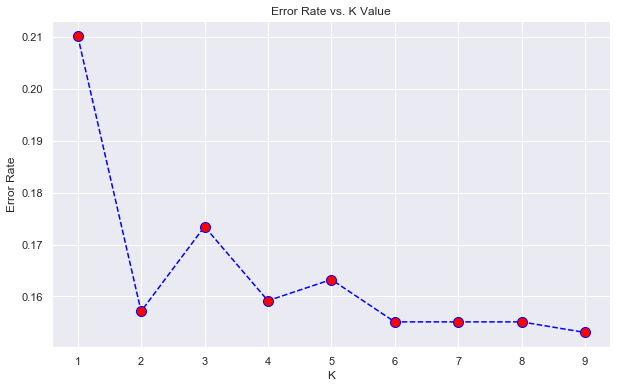

In [62]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The error rate is the lowest with 7 neighbors (better to choose an odd number)

Now let's compare with the recall score

Text(0, 0.5, 'Recall')

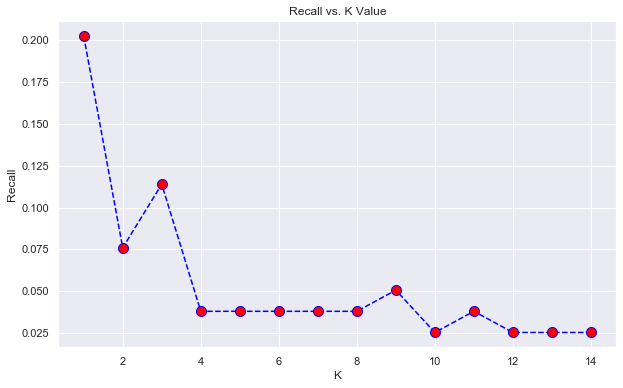

In [63]:
recall = []
# Will take some time
from sklearn import metrics
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    recall.append(metrics.recall_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),recall,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')

We can see, even though k=7 was the best number to reduce the error rate, in order to get the maximum recall value, k=3 is the best

In [64]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
knn_recall = recall_score(y_test,y_pred)

In [65]:
knn_recall

0.11392405063291139

So far, KNN has been the model that returned the lowest Recall Score. The logistic Regression is the best model so far

# Decision Tree, Random Forest, XGBoost, AdaBoost and CatBoost

## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [67]:
X_train, X_test,y_train,y_test = train_test_split(employees_dummies.drop('Attrition',axis=1), \
                                                  employees_dummies.Attrition, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=employees_dummies.Attrition
                                                 )

In [68]:
model1=DecisionTreeClassifier(class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
dt_acc=accuracy_score(y_test, y_pred1)
dt_rec=recall_score(y_test, y_pred1)
dt_pre=precision_score(y_test, y_pred1)
dt_f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', dt_acc)
print('Recall', dt_rec)
print('Precision', dt_pre)
print('F1', dt_f11)

array([[369,  42],
       [ 59,  20]], dtype=int64)

Accuracy 0.7938775510204081
Recall 0.25316455696202533
Precision 0.3225806451612903
F1 0.28368794326241137


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
X_train, X_test,y_train,y_test = train_test_split(employees_dummies.drop('Attrition',axis=1), \
                                                  employees_dummies.Attrition, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=employees_dummies.Attrition
                                                 )

In [71]:
model1=RandomForestClassifier(class_weight='balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
rf_acc=accuracy_score(y_test, y_pred1)
rf_rec=recall_score(y_test, y_pred1)
rf_pre=precision_score(y_test, y_pred1)
rf_f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', rf_acc)
print('Recall', rf_rec)
print('Precision', rf_pre)
print('F1', rf_f11)

array([[407,   4],
       [ 73,   6]], dtype=int64)

Accuracy 0.8428571428571429
Recall 0.0759493670886076
Precision 0.6
F1 0.13483146067415733


## XGBoost

In [72]:
from xgboost import XGBClassifier

In [73]:
X_train, X_test,y_train,y_test = train_test_split(employees_dummies.drop('Attrition',axis=1), \
                                                  employees_dummies.Attrition, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=employees_dummies.Attrition
                                                 )

In [74]:
model1=XGBClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
xg_acc=accuracy_score(y_test, y_pred1)
xg_rec=recall_score(y_test, y_pred1)
xg_pre=precision_score(y_test, y_pred1)
xg_f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', xg_acc)
print('Recall', xg_rec)
print('Precision', xg_pre)
print('F1', xg_f11)

array([[399,  12],
       [ 60,  19]], dtype=int64)

Accuracy 0.8530612244897959
Recall 0.24050632911392406
Precision 0.6129032258064516
F1 0.34545454545454546


## AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
X_train, X_test,y_train,y_test = train_test_split(employees_dummies.drop('Attrition',axis=1), \
                                                  employees_dummies.Attrition, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=employees_dummies.Attrition
                                                 )

In [77]:
model1=AdaBoostClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
ada_acc=accuracy_score(y_test, y_pred1)
ada_rec=recall_score(y_test, y_pred1)
ada_pre=precision_score(y_test, y_pred1)
ada_f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', ada_acc)
print('Recall', ada_rec)
print('Precision', ada_pre)
print('F1', ada_f11)

array([[392,  19],
       [ 48,  31]], dtype=int64)

Accuracy 0.863265306122449
Recall 0.3924050632911392
Precision 0.62
F1 0.4806201550387597


## CatBoost

In [78]:
from catboost import CatBoostClassifier

In [79]:
X_train, X_test,y_train,y_test = train_test_split(employees_dummies.drop('Attrition',axis=1), \
                                                  employees_dummies.Attrition, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=employees_dummies.Attrition
                                                 )

In [80]:
model1=CatBoostClassifier(auto_class_weights='Balanced')
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)#Because Catboost converts the booleans to Text. Eval function converts back to boolean
cat_acc=accuracy_score(y_test, y_pred1)
cat_rec=recall_score(y_test, y_pred1)
cat_pre=precision_score(y_test, y_pred1)
cat_f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', cat_acc)
print('Recall', cat_rec)
print('Precision', cat_pre)
print('F1', cat_f11)

Learning rate set to 0.010214
0:	learn: 0.6901617	total: 144ms	remaining: 2m 23s
1:	learn: 0.6866240	total: 146ms	remaining: 1m 13s
2:	learn: 0.6829464	total: 149ms	remaining: 49.6s
3:	learn: 0.6800846	total: 151ms	remaining: 37.7s
4:	learn: 0.6774173	total: 153ms	remaining: 30.5s
5:	learn: 0.6747735	total: 156ms	remaining: 25.8s
6:	learn: 0.6706030	total: 158ms	remaining: 22.4s
7:	learn: 0.6673404	total: 160ms	remaining: 19.8s
8:	learn: 0.6646147	total: 162ms	remaining: 17.8s
9:	learn: 0.6616435	total: 165ms	remaining: 16.3s
10:	learn: 0.6589650	total: 167ms	remaining: 15s
11:	learn: 0.6555233	total: 169ms	remaining: 13.9s
12:	learn: 0.6535579	total: 172ms	remaining: 13s
13:	learn: 0.6516355	total: 174ms	remaining: 12.2s
14:	learn: 0.6495262	total: 176ms	remaining: 11.5s
15:	learn: 0.6463739	total: 178ms	remaining: 10.9s
16:	learn: 0.6432636	total: 181ms	remaining: 10.5s
17:	learn: 0.6398261	total: 183ms	remaining: 10s
18:	learn: 0.6373838	total: 186ms	remaining: 9.6s
19:	learn: 0.635

165:	learn: 0.4214240	total: 515ms	remaining: 2.58s
166:	learn: 0.4206567	total: 517ms	remaining: 2.58s
167:	learn: 0.4197638	total: 519ms	remaining: 2.57s
168:	learn: 0.4190443	total: 521ms	remaining: 2.56s
169:	learn: 0.4181786	total: 524ms	remaining: 2.56s
170:	learn: 0.4173223	total: 526ms	remaining: 2.55s
171:	learn: 0.4165761	total: 528ms	remaining: 2.54s
172:	learn: 0.4152393	total: 530ms	remaining: 2.54s
173:	learn: 0.4148241	total: 532ms	remaining: 2.53s
174:	learn: 0.4139271	total: 535ms	remaining: 2.52s
175:	learn: 0.4131851	total: 537ms	remaining: 2.52s
176:	learn: 0.4125608	total: 540ms	remaining: 2.51s
177:	learn: 0.4114250	total: 542ms	remaining: 2.5s
178:	learn: 0.4108403	total: 544ms	remaining: 2.5s
179:	learn: 0.4099142	total: 546ms	remaining: 2.49s
180:	learn: 0.4093348	total: 548ms	remaining: 2.48s
181:	learn: 0.4086322	total: 551ms	remaining: 2.48s
182:	learn: 0.4079582	total: 553ms	remaining: 2.47s
183:	learn: 0.4070027	total: 555ms	remaining: 2.46s
184:	learn: 0.

380:	learn: 0.2828584	total: 975ms	remaining: 1.58s
381:	learn: 0.2824628	total: 977ms	remaining: 1.58s
382:	learn: 0.2819547	total: 979ms	remaining: 1.58s
383:	learn: 0.2813481	total: 981ms	remaining: 1.57s
384:	learn: 0.2809804	total: 984ms	remaining: 1.57s
385:	learn: 0.2806365	total: 986ms	remaining: 1.57s
386:	learn: 0.2801377	total: 988ms	remaining: 1.56s
387:	learn: 0.2797192	total: 990ms	remaining: 1.56s
388:	learn: 0.2794717	total: 992ms	remaining: 1.56s
389:	learn: 0.2791794	total: 994ms	remaining: 1.55s
390:	learn: 0.2786380	total: 996ms	remaining: 1.55s
391:	learn: 0.2780609	total: 999ms	remaining: 1.55s
392:	learn: 0.2776331	total: 1s	remaining: 1.55s
393:	learn: 0.2770246	total: 1s	remaining: 1.54s
394:	learn: 0.2766313	total: 1s	remaining: 1.54s
395:	learn: 0.2762564	total: 1.01s	remaining: 1.54s
396:	learn: 0.2756002	total: 1.01s	remaining: 1.53s
397:	learn: 0.2753077	total: 1.01s	remaining: 1.53s
398:	learn: 0.2749240	total: 1.01s	remaining: 1.53s
399:	learn: 0.2747311

539:	learn: 0.2217577	total: 1.31s	remaining: 1.11s
540:	learn: 0.2215449	total: 1.31s	remaining: 1.11s
541:	learn: 0.2212027	total: 1.31s	remaining: 1.11s
542:	learn: 0.2209546	total: 1.31s	remaining: 1.11s
543:	learn: 0.2205616	total: 1.32s	remaining: 1.1s
544:	learn: 0.2202347	total: 1.32s	remaining: 1.1s
545:	learn: 0.2200375	total: 1.32s	remaining: 1.1s
546:	learn: 0.2195924	total: 1.32s	remaining: 1.1s
547:	learn: 0.2191543	total: 1.33s	remaining: 1.09s
548:	learn: 0.2187112	total: 1.33s	remaining: 1.09s
549:	learn: 0.2185139	total: 1.33s	remaining: 1.09s
550:	learn: 0.2183905	total: 1.33s	remaining: 1.09s
551:	learn: 0.2181525	total: 1.34s	remaining: 1.08s
552:	learn: 0.2179861	total: 1.34s	remaining: 1.08s
553:	learn: 0.2178500	total: 1.34s	remaining: 1.08s
554:	learn: 0.2176466	total: 1.34s	remaining: 1.08s
555:	learn: 0.2174715	total: 1.34s	remaining: 1.07s
556:	learn: 0.2170004	total: 1.35s	remaining: 1.07s
557:	learn: 0.2165774	total: 1.35s	remaining: 1.07s
558:	learn: 0.21

705:	learn: 0.1703801	total: 1.69s	remaining: 705ms
706:	learn: 0.1699648	total: 1.7s	remaining: 703ms
707:	learn: 0.1695913	total: 1.7s	remaining: 700ms
708:	learn: 0.1693075	total: 1.7s	remaining: 698ms
709:	learn: 0.1689229	total: 1.7s	remaining: 695ms
710:	learn: 0.1685363	total: 1.7s	remaining: 693ms
711:	learn: 0.1681100	total: 1.71s	remaining: 690ms
712:	learn: 0.1677283	total: 1.71s	remaining: 688ms
713:	learn: 0.1674742	total: 1.71s	remaining: 685ms
714:	learn: 0.1671666	total: 1.71s	remaining: 683ms
715:	learn: 0.1669495	total: 1.72s	remaining: 681ms
716:	learn: 0.1667323	total: 1.72s	remaining: 678ms
717:	learn: 0.1664492	total: 1.72s	remaining: 676ms
718:	learn: 0.1662000	total: 1.72s	remaining: 673ms
719:	learn: 0.1659965	total: 1.73s	remaining: 671ms
720:	learn: 0.1657040	total: 1.73s	remaining: 669ms
721:	learn: 0.1654079	total: 1.73s	remaining: 666ms
722:	learn: 0.1650897	total: 1.73s	remaining: 664ms
723:	learn: 0.1648528	total: 1.73s	remaining: 661ms
724:	learn: 0.164

922:	learn: 0.1167722	total: 2.15s	remaining: 179ms
923:	learn: 0.1165535	total: 2.15s	remaining: 177ms
924:	learn: 0.1164442	total: 2.15s	remaining: 174ms
925:	learn: 0.1161884	total: 2.15s	remaining: 172ms
926:	learn: 0.1159399	total: 2.15s	remaining: 170ms
927:	learn: 0.1157024	total: 2.16s	remaining: 167ms
928:	learn: 0.1154027	total: 2.16s	remaining: 165ms
929:	learn: 0.1151692	total: 2.16s	remaining: 163ms
930:	learn: 0.1149411	total: 2.16s	remaining: 160ms
931:	learn: 0.1146803	total: 2.17s	remaining: 158ms
932:	learn: 0.1143287	total: 2.17s	remaining: 156ms
933:	learn: 0.1141385	total: 2.17s	remaining: 153ms
934:	learn: 0.1139243	total: 2.17s	remaining: 151ms
935:	learn: 0.1136605	total: 2.17s	remaining: 149ms
936:	learn: 0.1134142	total: 2.17s	remaining: 146ms
937:	learn: 0.1131707	total: 2.18s	remaining: 144ms
938:	learn: 0.1130136	total: 2.18s	remaining: 142ms
939:	learn: 0.1128124	total: 2.18s	remaining: 139ms
940:	learn: 0.1126394	total: 2.18s	remaining: 137ms
941:	learn: 

array([[389,  22],
       [ 49,  30]], dtype=int64)

Accuracy 0.8551020408163266
Recall 0.379746835443038
Precision 0.5769230769230769
F1 0.4580152671755725


# Which model has the best Recall Score?

In [81]:
print('Decision Tree: '+str(dt_rec))
print('Random Forest: '+str(rf_rec))
print('XGBoost: '+str(xg_rec))
print('AdaBoost: '+str(ada_rec))
print('CatBoost: '+str(cat_rec))

Decision Tree: 0.25316455696202533
Random Forest: 0.0759493670886076
XGBoost: 0.24050632911392406
AdaBoost: 0.3924050632911392
CatBoost: 0.379746835443038


From the scores above, we can conclude that the model with the best Recall Score is **the AdaBoost model**

Is it still better than the Logistic Regression?

In [87]:
print(sfs_recall)

0.9935483870967742


And the answer is **no**. The Logistic Regression has a better Recall Score than the AdaBoost model